In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import RYGate

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex
import qiskit.quantum_info as qi
from qiskit.circuit.library import CSwapGate
from qiskit.circuit.library import RYGate

In [112]:
x, y = 0.3, 0.1
theta = np.arccos(x)
U = RYGate(theta * 2)

In [113]:
qc = QuantumCircuit(1,1)
qc.append(U, [0])
state = qi.Statevector.from_instruction(qc)
qc.measure(0, 0)
qc.draw("mpl")
state.draw("latex")

<IPython.core.display.Latex object>

In [13]:
def run_experiment(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=8192).result()
    counts = results.get_counts()
    display(plot_histogram(counts))
    return counts

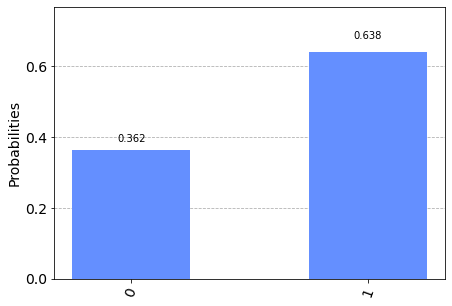

{'1': 5227, '0': 2965}

In [17]:
run_experiment(qc)

In [67]:
def gate_from_state(a, b):
    norm = math.sqrt(a ** 2 + b ** 2)
    x, y = a / norm, b / norm
    if y >= 0:
        theta = np.arccos(x)
    elif x <= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    elif x >= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    U = RYGate(theta * 2) 
    U = RYGate(theta * 2)
    return U

In [182]:
def run_experiment(circuit, verbose = False):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=50000).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

def test_gate(gate):
    qc = QuantumCircuit(1,1)
    qc.append(gate, [0])
    n = qi.Statevector.from_instruction(qc)
    qc.measure(0, 0)
    display(qc.draw("mpl"))
    display(n.draw())
    run_experiment(qc)

In [123]:
v = [0.9, 0.3, 0.3, 0.1]

In [124]:
a, b, c, d = 0.3, 0.3, 0.9, 0.1

0.4242640687119285 0.9055385138137417


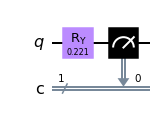

'Statevector([0.99388373+0.j, 0.11043153+0.j],\n            dims=(2,))'

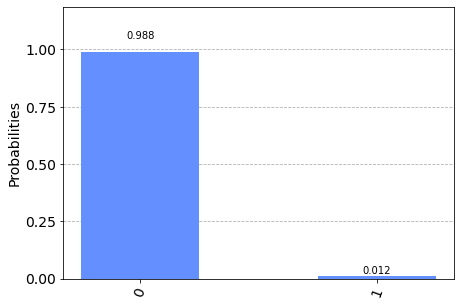

In [126]:
U_ab = gate_from_state(a, b)
U_ab_inverse = U_ab.inverse()
U_cd = gate_from_state(c, d)

qr = QuantumCircuit(1)
qr.append(U_ab_inverse,[0])
qr.append(U_cd,[0])

U_ab_cd = qr.to_gate(label ="ab->cd")
cU_ab_cd = U_ab_cd.control(1)

In [134]:
main = QuantumCircuit(2)
main.append(U_first, [0])
main.append(U_ab, [1])
main.append(cU_ab_cd, [0, 1])
state = qi.Statevector.from_instruction(main)
main.draw("mpl")
state.draw("latex")

<IPython.core.display.Latex object>

In [155]:
def create_gate_from_4(x, y, z, t):
    norm = math.sqrt(x ** 2 + y ** 2 + z ** 2 + t ** 2)
    a, c, b, d = x / norm,  y / norm, z / norm, t / norm
    print(a, b, c, d)
    ab_norm = math.sqrt(a ** 2 + b ** 2)
    cd_norm = math.sqrt(c ** 2 + d ** 2)
    U_first = gate_from_state(ab_norm, cd_norm)
    U_ab = gate_from_state(a, b)
    U_ab_inverse = U_ab.inverse()
    
    U_cd = gate_from_state(c, d)
    
    qr = QuantumCircuit(1)
    qr.append(U_ab_inverse,[0])
    qr.append(U_cd,[0])
    U_ab_cd = qr.to_gate(label ="ab->cd")
    cU_ab_cd = U_ab_cd.control(1)
    
    main = QuantumCircuit(2)
    main.append(U_first, [0])
    main.append(U_ab, [1])
    main.append(cU_ab_cd, [0, 1])
    
    return main.to_gate(label = f"U")


0.4745789978762495 0.4745789978762495 0.5694947974514994 0.4745789978762495


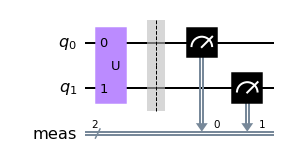

<IPython.core.display.Latex object>

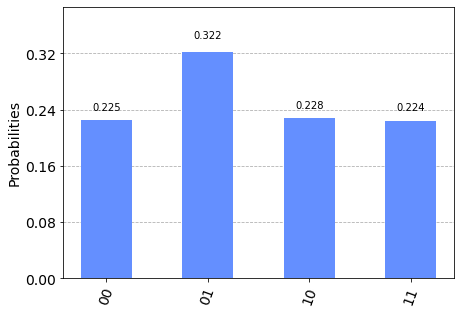

{'01': 16109, '10': 11402, '11': 11216, '00': 11273}

In [156]:
g = create_gate_from_4(0.5, 0.6, 0.5, 0.5)
test = QuantumCircuit(2)
test.append(g, [0, 1])
state = qi.Statevector.from_instruction(test)
test.measure_all()
display(test.draw("mpl"))
display(state.draw("latex"))
run_experiment(test)

0.9 0.3 0.1 0.3
0.3 0.1 0.3 0.9


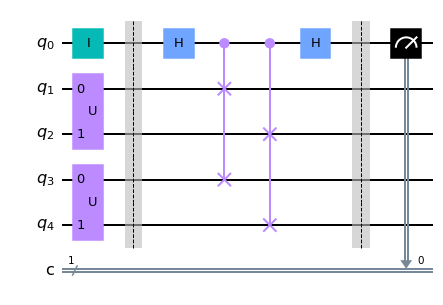

0.602262401283693


In [191]:
g9133 = create_gate_from_4(0.9, 0.1, 0.3, 0.3)
g3319 = create_gate_from_4(0.3, 0.3, 0.1, 0.9)

qc = QuantumCircuit(5, 1)
qc.i(0)
qc.append(g9133, [1, 2])
qc.append(g3319, [3, 4])
qc.barrier()
qc.h(0)
qc.append(CSwapGate(), [0, 1, 3])
qc.append(CSwapGate(), [0, 2, 4])
qc.h(0)

qc.barrier()
qc.measure(0, 0)

display(qc.draw("mpl"))

c = run_experiment(qc)
p = c['1'] / (c['0'] + c['1'])
squared = 1 - 2 * p
print(math.sqrt(squared))

0.6


In [ ]:
def get_sim_score(v1, v2):
    g1 = create_gate_from_4(v1[0], v1[1], v1[2], v1[3])
    g2 = create_gate_from_4(v2[0], v2[1], v2[2], v2[3])
    qc = QuantumCircuit(5, 1)
    qc.i(0)
    qc.append(g1, [1, 2])
    qc.append(g2, [3, 4])
    qc.barrier()
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 3])
    qc.append(CSwapGate(), [0, 2, 4])
    qc.h(0)

    qc.barrier()
    qc.measure(0, 0)

    display(qc.draw("mpl"))

    c = run_experiment(qc)
    p = c['1'] / (c['0'] + c['1'])
    return 1 - 2 * p